# CatBoost

GBM의 파생형으로 범주형 특징을 처리하는데 뛰어난 알고리즘으로 분류 및 회귀에 모두 적합하다,

Ordered boosting과 Ordered target encoding과 같이 독특한 기능을 가지고 있다.



### 데이터 포인트(Data Poin)란,



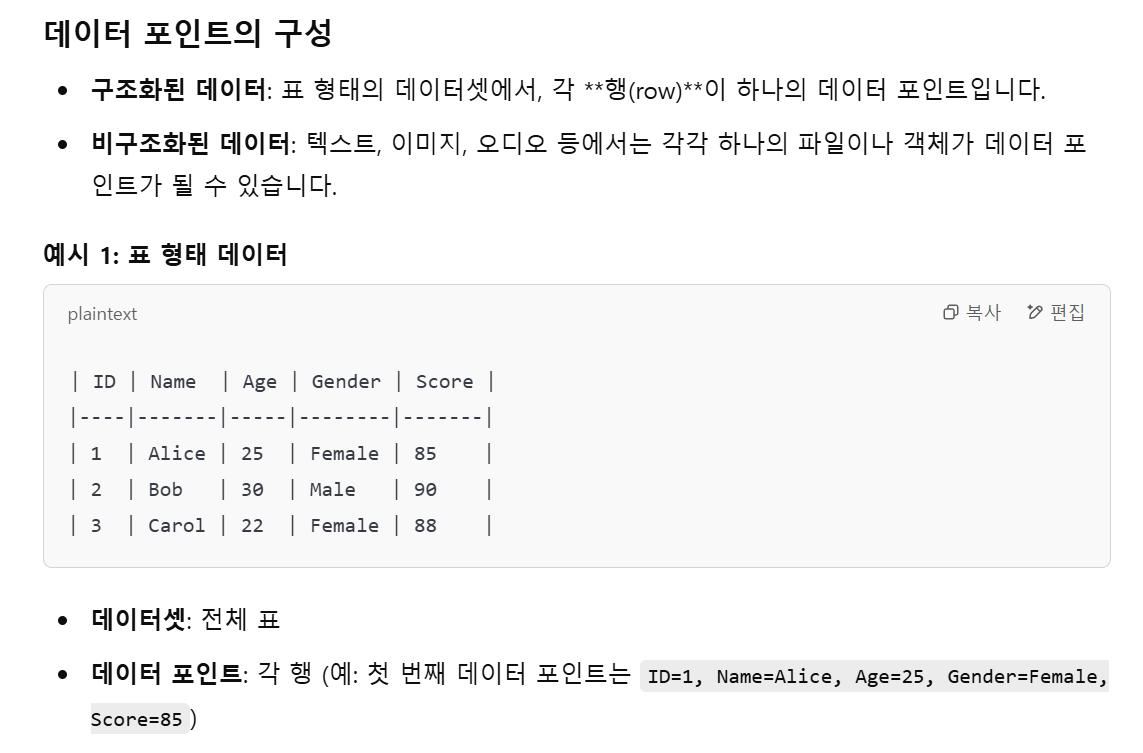

### Ordered Boosting

기존의 부스팅 알고리즘은 각각 새로운 트리가 모든 데이터셋을 사용한다. -> 과적합 될 가능성이 높다.

그러나 CatBoost는 데이터셋의 순서를 바꿔서 여러 순열을 생성하여 모델을 구축한다. 각 인스턴스는 해당 순열에서 이전 인스턴스의 정보만 사용한다.

최종모델은 이러한 여러 순열의 결과만 총합한다. 그래서 전체 데이터셋을 사용하는 것이 아니기 때문에 과적합을 피할 수 있다.


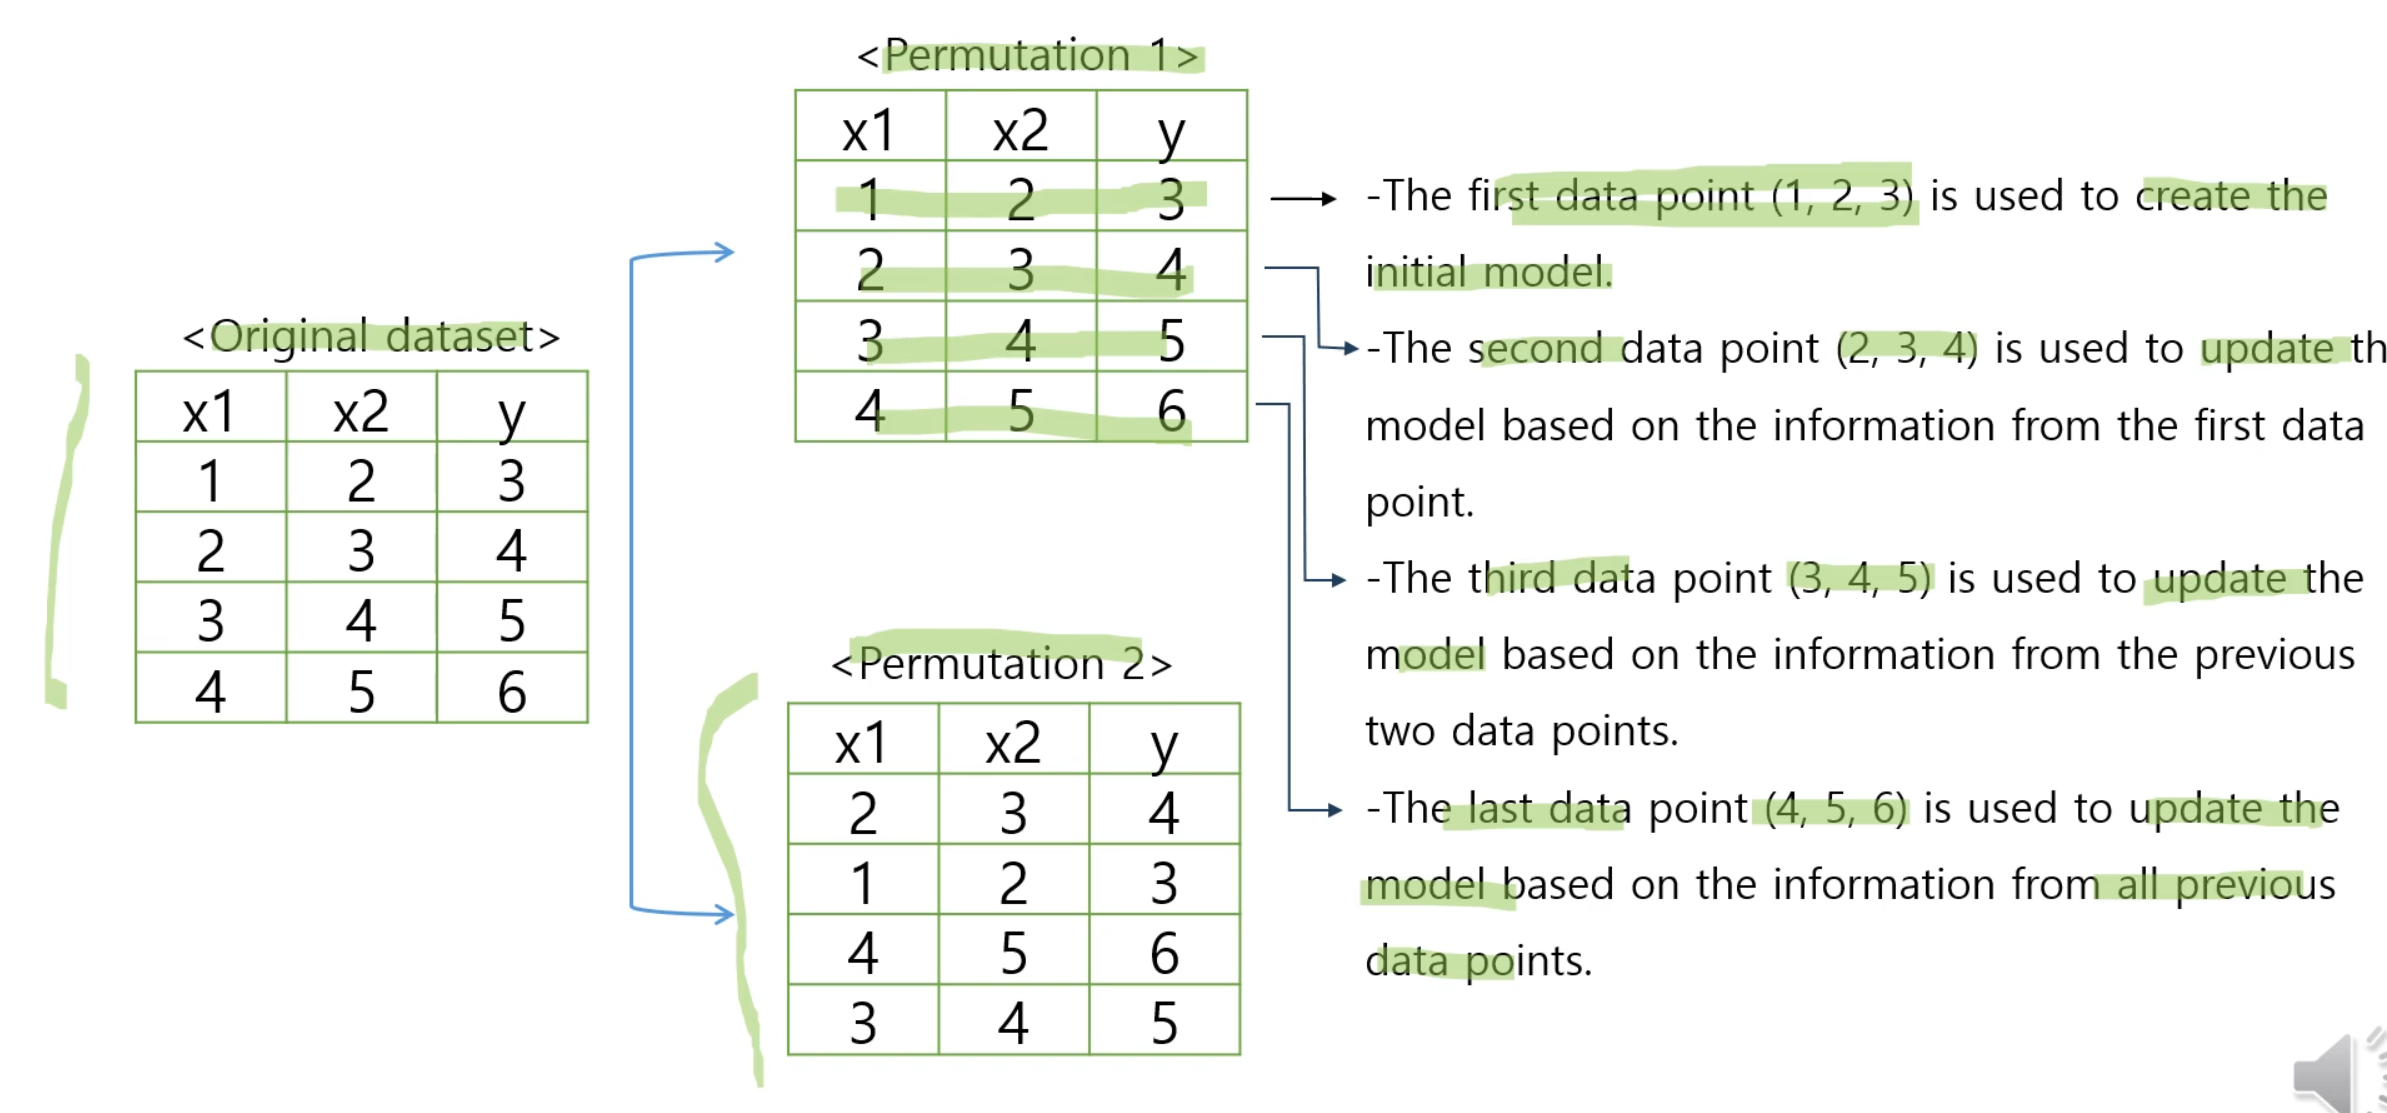

1. **첫번째 데이터 포인트**(행)를 사용하여 **초기 모델**을 만든다.

2. **두번째 데이터 포인트**를 전에 만든 모델(**첫번째 데이터포인트 만들어진 모델**) 업데이트한다.

3. **세번째 데이터 포인트**를 전에 만든 모델(**첫번째, 두번째 데이터포인트로 만들어진 모델**)에 업데이트 한다.

4. **마지막 데이터 포인트**를 전에 만든 모델(**첫번째, 두번째, 세번째 데이터 포인트로 만들어진 모델**)에 업데이트한다.

5. 두번째 순열도 같은 방법을 반복한다.

6. 각 순열에서 학습된 모델의 결과를 종합하여 최종 모델을 구축한다.

### Random Permutation


위에서 Ordered Boosting 을 할 때, 데이터 순서를 섞어주지 않으면 매번 같은 순서대로 잔차를 예측하는 모델을 만들 가능성이 있다.

이 순서는 사실 우리가 임의로 정한 것임으로, 순서 역시 매번 섞어줘야 한다.

Catboost 는 이러한 것 역시 감안해서 데이터를 셔플링하여 뽑아낸다.

뽑아낼 때도 역시 모든 데이터를 뽑는게 아니라, 그 중 일부만 가져오게 할 수 있다. 이 모든 기법이 다 오버피팅 방지를 위해, 트리를 다각적으로 만들려는 시도이다.

### Ordered Target Encoding

Ordered Target Encoding은 훈련 과정중에 범주형 특징들을 처리하기 위해 사용된다.

범주형 특성(categorical feature)과 타겟 변수(target variable)들과의 관계를 찾아내고, Target Leakage를 줄이기 위해 사용된다.

***Target Leakage** 란,
훈련 과정 중 정답이 초기에 노출 되는 것을 말한다. 범주형 값을 평균 타겟 값으로 변환할때 타겟 정보가 훈련 데이터에 누출 될 수 있다.

타겟 값이 훈련데이터에 포함되면 훈련데이터에서는 높은 정확도를 보여줄 수 있지만, 테스트 데이터에서는 예측 성능이 저하될 수 있다.





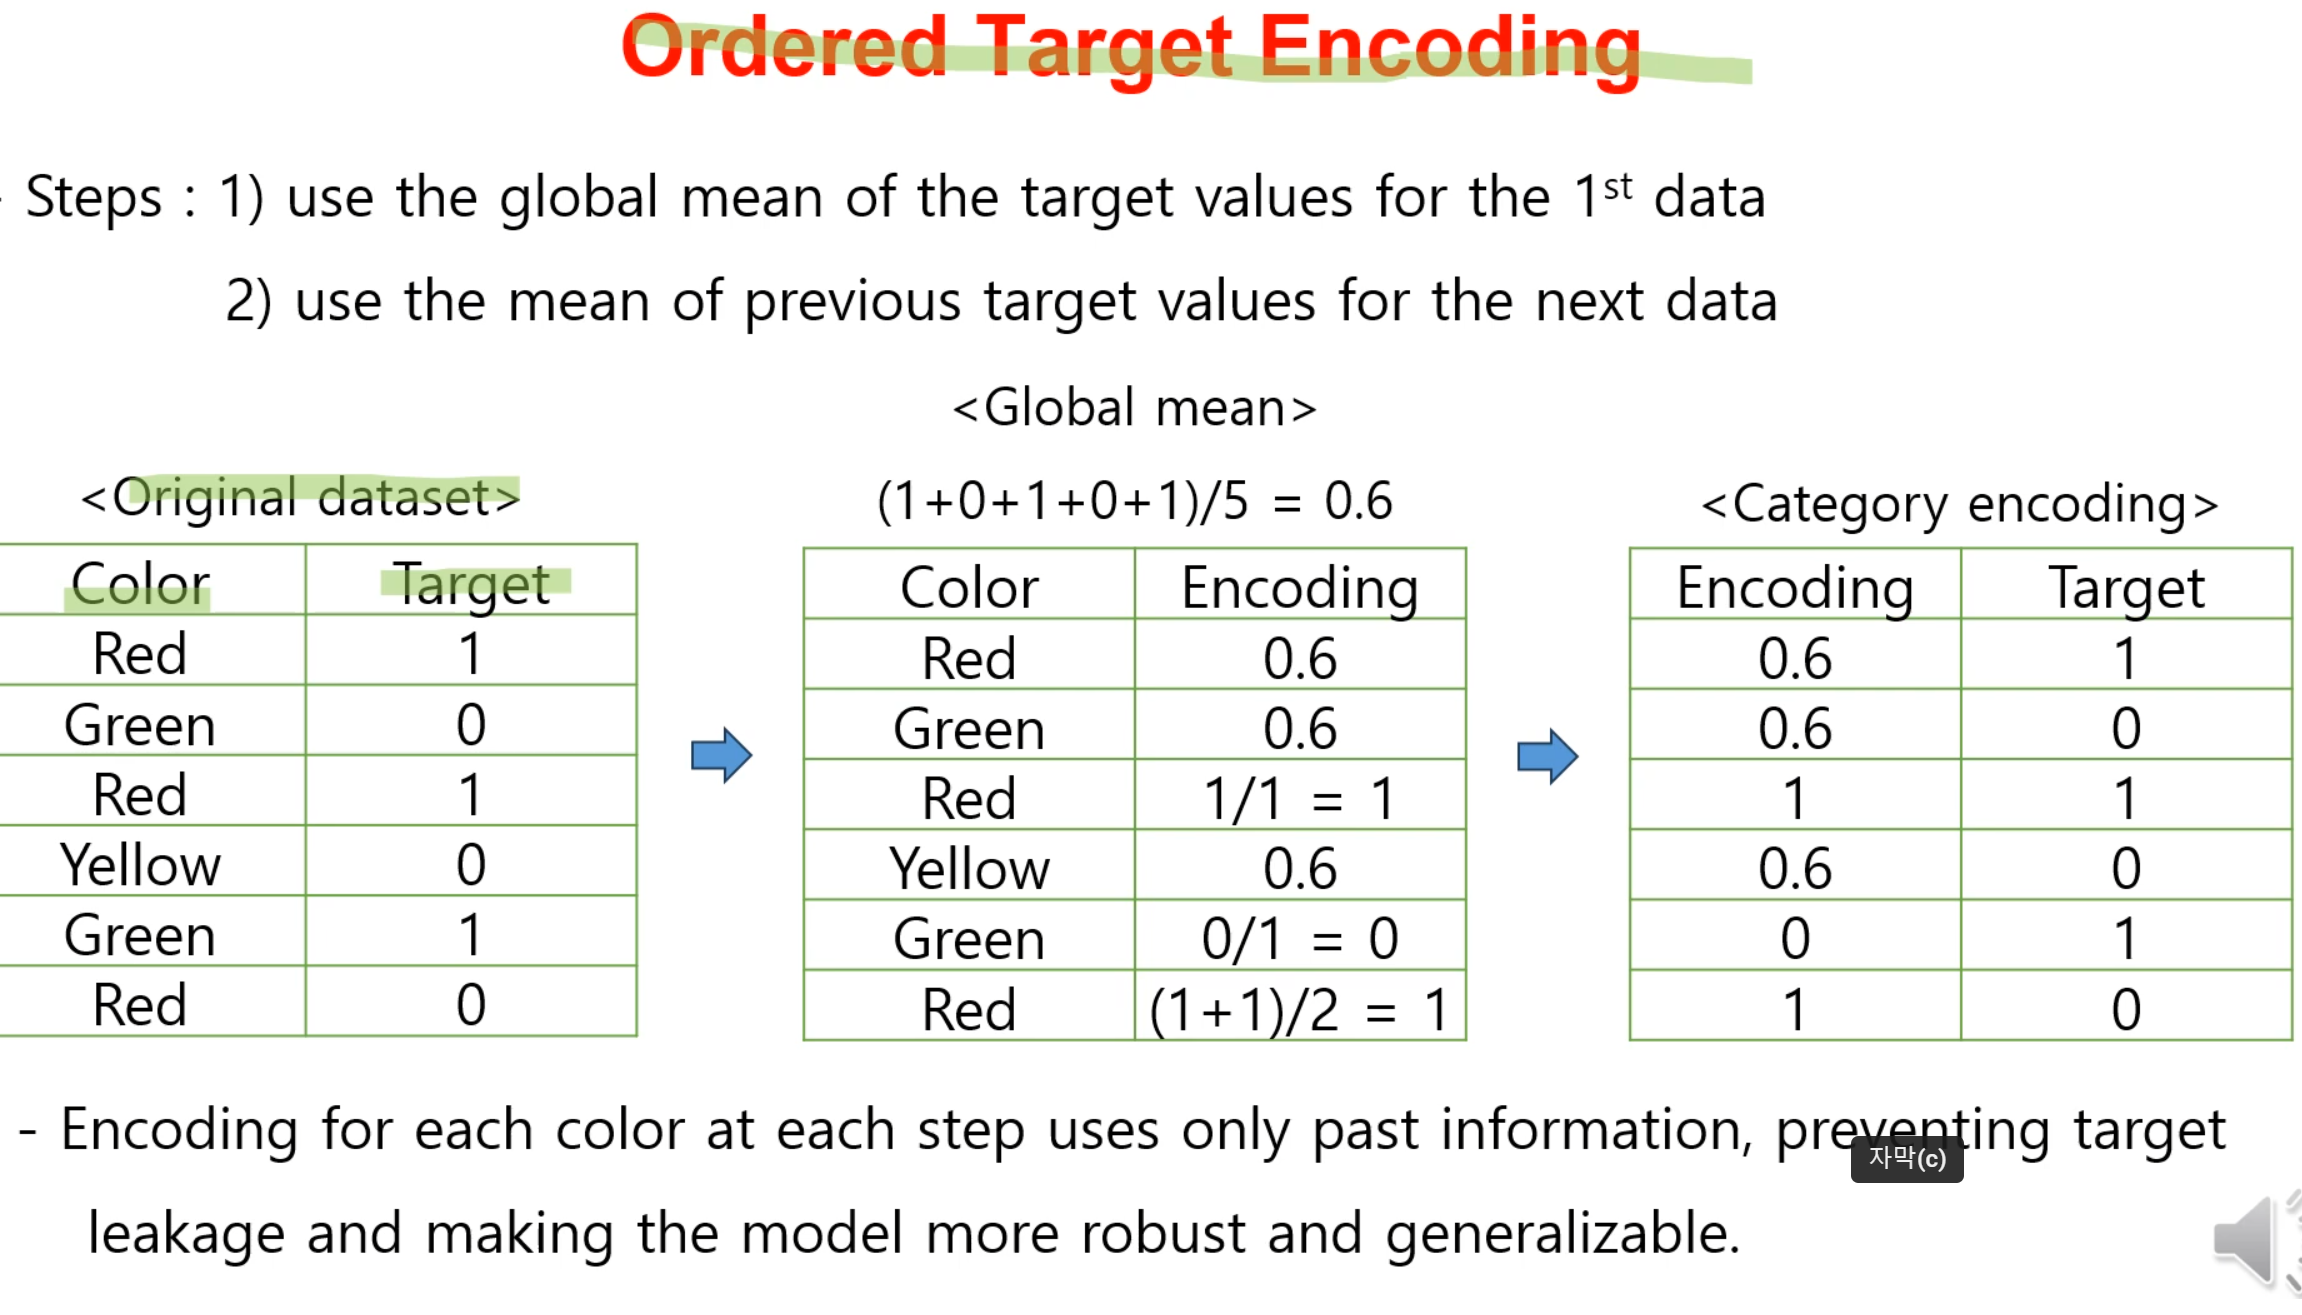

1. 처음에는 전역변수(Global Mean)을 구한다.
2. 다음 데이터에는 이전 타겟 값들의 평균을 사용한다.

Global mean = 1 + 0 + 1 + 0 + 1 + 0 / 5 -> 분모가 6이어야 하는데 아마 계산 실수 인 것 같다.
예를 들어,
- 첫번째 Red = Global mean = 0.6
- 두번째 Red = 첫번째 Red의 Target 값 1, 이전에 Red는 한 개 있었기 때문에 1,
그래서 1/1 = 1.
- 세번째 Red는 첫번째 Red의 Target 값 1, 두번째 Red의 Target 값 1, 위에 Red의 개수가 두 개 있었기 때문에 2, 1+1/2 = 1로 계산된다.

### Categorical Feature Combination

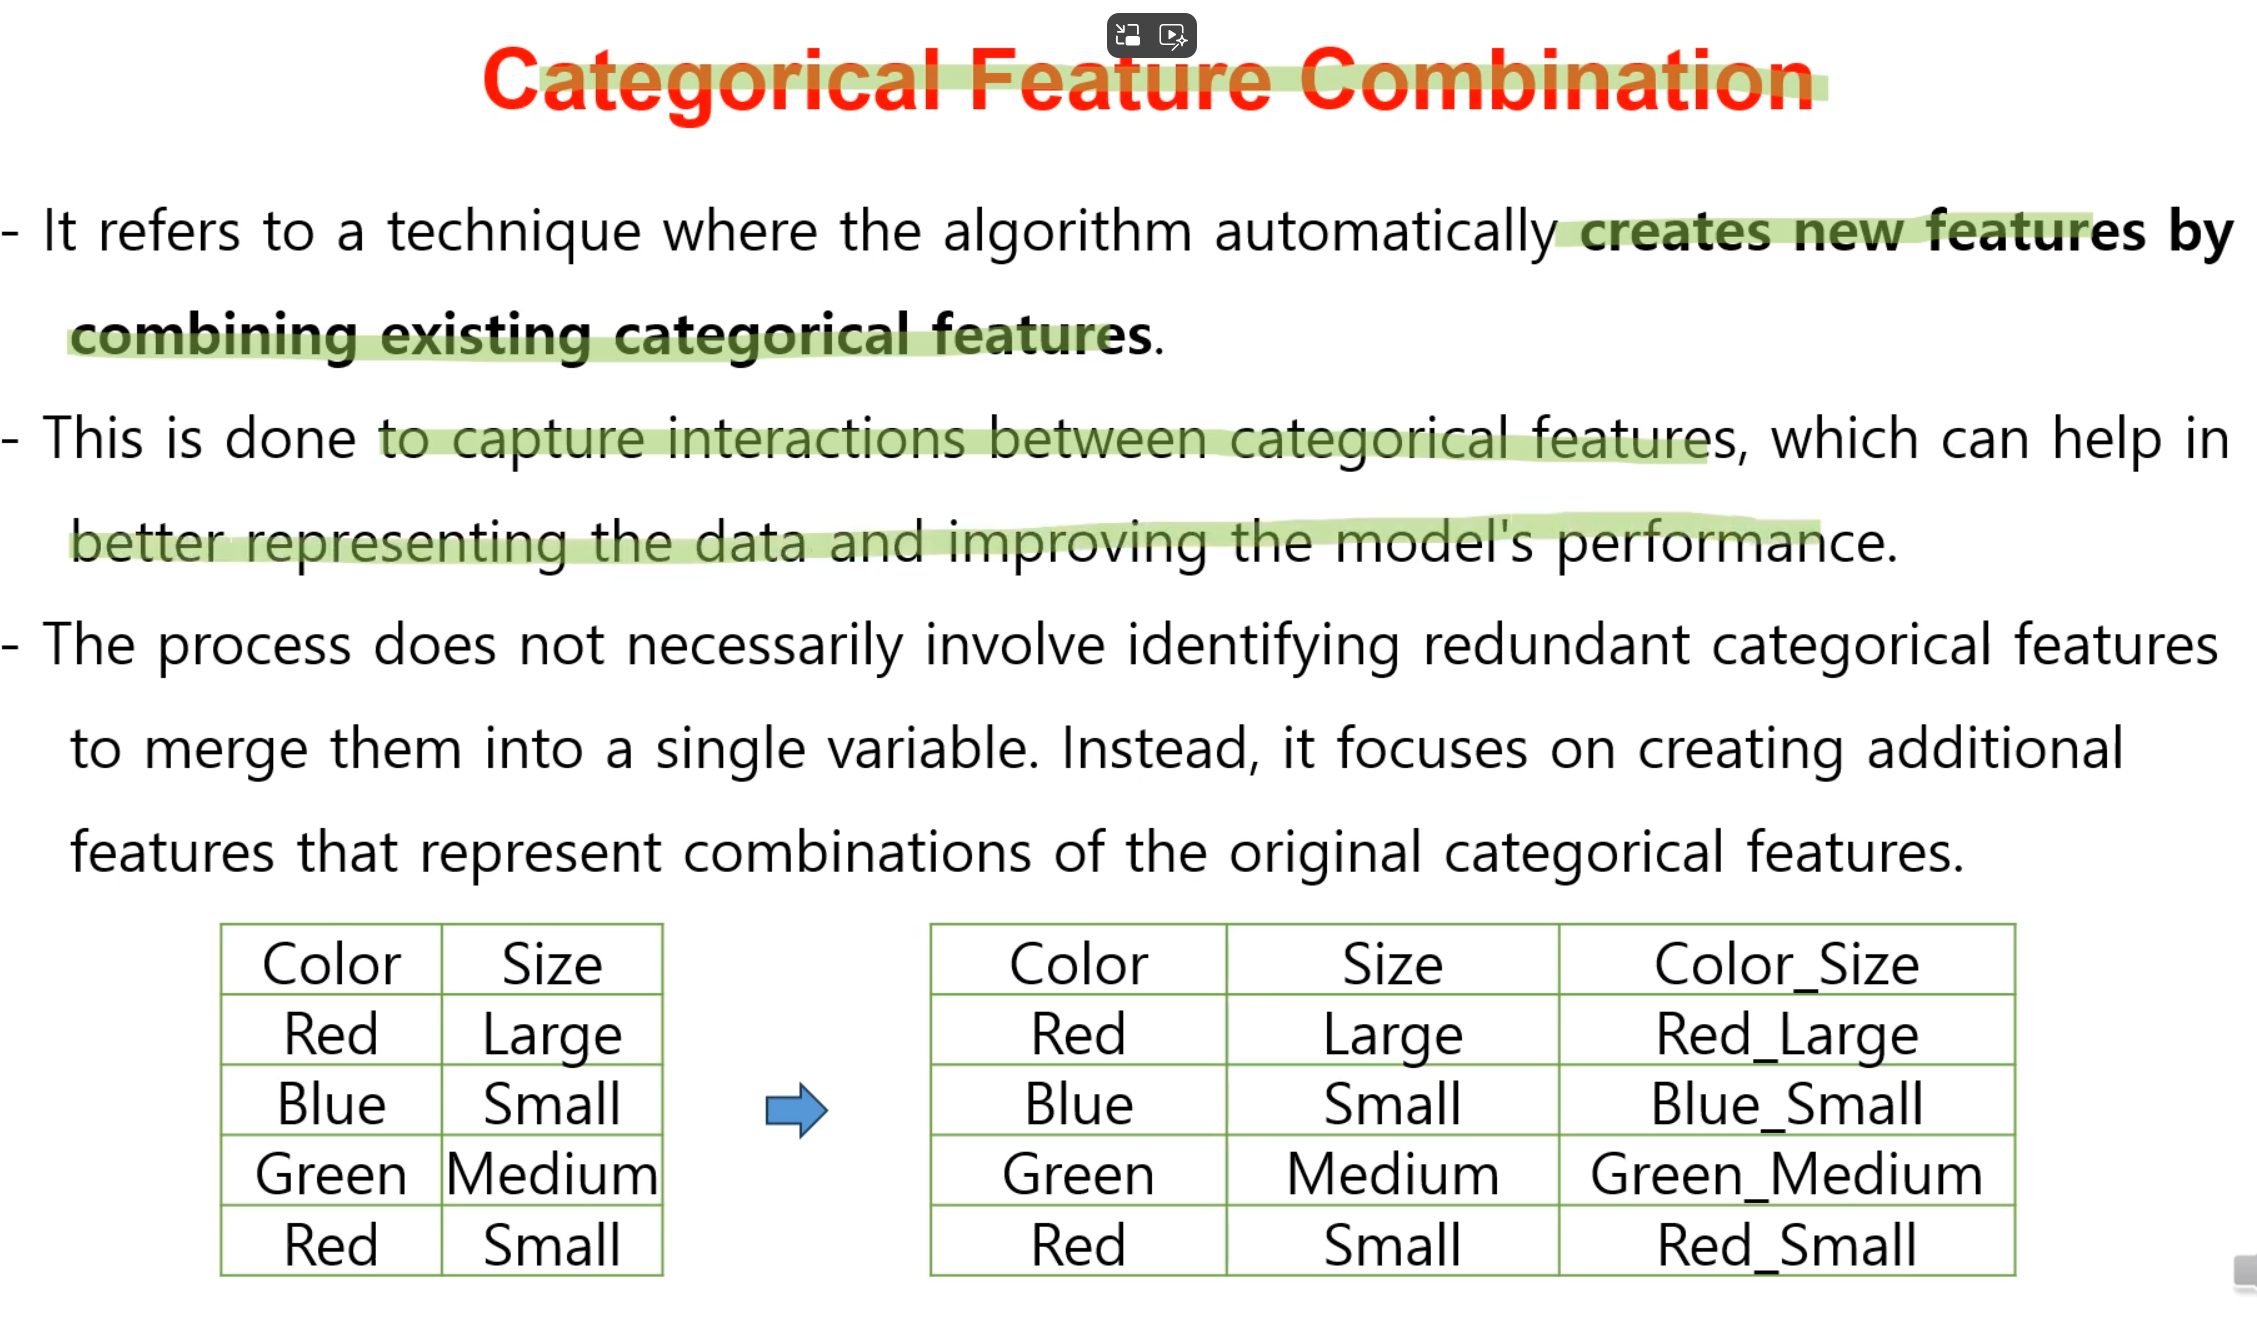

- 기존의 특징과 새로운 특징을 결합하여 새로운 특성을 생성하는 기술이다.

- 여러개의 특징을 하나로 합치기 때문에 모델의 성능을 높여준다.

In [ ]:
!pip install catboost

In [6]:
from sklearn.datasets import load_iris
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# GBM 모델 생성
model = CatBoostClassifier(
    iterations = 100,
    learning_rate = 0.01,
    depth=6,
    random_seed=42
)

# convert the training data to CatBoost Pool
train_pool = Pool(X_train,label= y_train)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
print('정확도 : ', model.score(X_train, y_train))

# 성능 평가
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

0:	learn: 1.0884596	total: 49.8ms	remaining: 4.93s
1:	learn: 1.0764018	total: 53.4ms	remaining: 2.62s
2:	learn: 1.0650049	total: 55.8ms	remaining: 1.8s
3:	learn: 1.0539500	total: 57ms	remaining: 1.37s
4:	learn: 1.0422475	total: 58.1ms	remaining: 1.1s
5:	learn: 1.0330863	total: 58.9ms	remaining: 923ms
6:	learn: 1.0243161	total: 60.4ms	remaining: 803ms
7:	learn: 1.0138461	total: 61.5ms	remaining: 708ms
8:	learn: 1.0038567	total: 62.9ms	remaining: 636ms
9:	learn: 0.9953962	total: 64.1ms	remaining: 577ms
10:	learn: 0.9865851	total: 65.5ms	remaining: 530ms
11:	learn: 0.9772297	total: 67ms	remaining: 492ms
12:	learn: 0.9668353	total: 68.6ms	remaining: 459ms
13:	learn: 0.9572051	total: 70.1ms	remaining: 430ms
14:	learn: 0.9483709	total: 71.6ms	remaining: 405ms
15:	learn: 0.9394744	total: 73ms	remaining: 383ms
16:	learn: 0.9285992	total: 74.6ms	remaining: 364ms
17:	learn: 0.9201965	total: 76.1ms	remaining: 346ms
18:	learn: 0.9112970	total: 77.5ms	remaining: 330ms
19:	learn: 0.9045033	total: 79